# Sparse Hebbian Learning: basics

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 10
DEBUG_DOWNSCALE, verbose = 1, 0

In [12]:
help(SHL)

Help on class SHL in module shl_scripts:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_size=(12, 12), database='database/', n_dictionary=196, learning_algorithm='mp', alpha=None, l0_sparseness=10, n_iter=16384, eta=0.01, eta_homeo=0.05, alpha_homeo=0.2, max_patches=1024, batch_size=256, n_image=200, DEBUG_DOWNSCALE=1, verbose=0, data_cache='./data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', **kwargs)
 |  
 |  get_data(self, name_database='serre07_distractors', seed=None, patch_norm=True)
 |  
 |  learn_dico(self, data=None, name_database='serre07_distractors', matname=None, record_each=0, **kwargs)
 |  
 |  plot_variance(self, dico, data=None, name_database='serre07_distractors', fn

In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='mp', verbose=verbose)
data = shl.get_data(name_database='serre07_distractors')

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (204800, 144)
average of patches =  2.68520738052e-19
average energy of patches =  1.0
std of the average of individual patches =  3.09801630558e-18


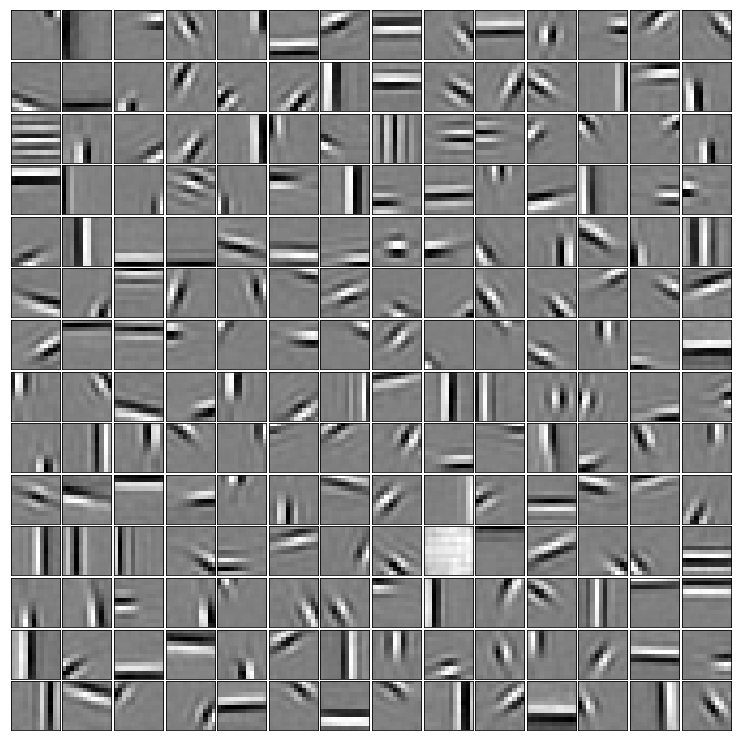

In [7]:
matname = 'vanilla'
dico = shl.learn_dico(matname=matname)
_ = shl.show_dico(dico)

In [8]:
patches = shl.code(data, dico)
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (204800, 144)
average of patches =  -0.000150575095313
average energy of patches =  0.86092849794
std of the average of individual patches =  0.00142819206003


In [9]:
code = dico.transform(data)
print('number of codes, size of codewords = ', code.shape)
print('average of codewords = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of codes, size of codewords =  (204800, 196)
average of codewords =  -0.000102667067857
average energy of patches =  0.738218391039
std of the average of individual patches =  0.00278839644745


In [10]:
error = data - patches
print('average of residual patches = ', error.mean())
print('average energy of residual patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

average of residual patches =  0.000150575095313
average energy of residual patches =  0.500730094831
std of the average of individual patches =  0.00142819206003


## Version used

In [11]:
%load_ext version_information
%version_information numpy

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.3.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.12.1rc1
Tue Mar 14 13:48:49 2017 CET